In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
pickle_in = open("Y.pickle", "rb")
y = pickle.load(pickle_in)
pickle_in = open("X.pickle", "rb")
X= pickle.load(pickle_in)

In [3]:
X= X/255.0
y = np.array(y)

In [4]:
print(X.shape[1:])

(150, 150, 1)


In [24]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation="relu", input_shape=X.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [26]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 256)       │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 72, 72, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 331776)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │      21,233,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,826,693 (83.26 MB)

 Trainable params: 21,826,693 (83.26 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.9527 - loss: 0.2978 - val_accuracy: 0.5847 - val_loss: 1.1213
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.9685 - loss: 0.2361 - val_accuracy: 0.5738 - val_loss: 1.2732
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.9734 - loss: 0.2010 - val_accuracy: 0.5738 - val_loss: 1.1807
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.9942 - loss: 0.1333 - val_accuracy: 0.5902 - val_loss: 1.1711
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.9902 - loss: 0.1320 - val_accuracy: 0.6011 - val_loss: 1.1832
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.9740 - loss: 0.1476 - val_accuracy: 0.5902 - val_loss: 1.2248
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.9829 - loss: 0.1308 - val_accuracy: 0.5792 - val_loss: 1.2844
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.9935 - loss: 0.1066 - val_accuracy: 0.

In [30]:
model.save('64x3-CNN.keras')

In [53]:
CATEGORIES = ["BLACKSPOT", "CANKER", "GREENING", "HEALTHY", "MELANOSE"]
def prepare(filepath):
    IMG_SIZE = 150
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("64x3-CNN.keras")

prediction = model.predict([prepare('leaves_healthy.png')])
print(prediction)
print(CATEGORIES[np.argmax(prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
[[0. 0. 0. 1. 0.]]
HEALTHY


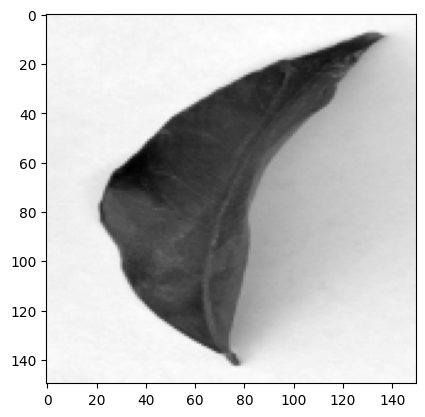

In [54]:
plt.imshow(prepare('leaves_healthy.png').reshape(150, 150), cmap="gray")
plt.show()